<a href="https://colab.research.google.com/github/rohanpagadala/AIML_Projects_coursework/blob/main/Exploring_Traffic_Accident_data_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORING TRAFFIC ACCIDENT DATA IN INDIA

## IMPORTING THE REQUIRED MODULES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

##LOADING THE DATASET AND CREATING THE DATAFRAME

In [ ]:
# Load the dataset
df = pd.read_csv('/content/India_car_accident_analysis_dataset(2022-2023).csv')
df.head()

,Num_Acc,inverse_data,week_day,state,severity,weather,location,hrmn,lum,vehicle_type,...,driver_sex,driver_age,car_age,casualty_severity,casualty_age,casualty_sex,social_class,casualty_type,pedestrian_or_passenger,cause
0,AID0001,20-11-2022,T,WB,Minor,Storm,Loc91,1958,Daylight,Car,...,M,48,20,Fatal,33,M,Upper,Pedestrian,Pedestrian,Traffic Control
1,AID0002,09-12-2023,T,TR,Severe,Fog,Loc184,2245,Daylight,Car,...,F,21,10,Slight,9,M,Middle,Pedestrian,Pedestrian,Traffic Control
2,AID0003,12-11-2022,W,HP,Moderate,Fog,Loc77,250,Twilight,Car,...,M,62,6,Slight,45,F,Working,Car Passenger,Pedestrian,Traffic Control
3,AID0004,13-02-2023,T,CG,Severe,Clear,Loc78,545,Night,Motorcycle,...,M,26,18,Serious,59,M,Working,Motorcyclist,Pedestrian,Traffic Control
4,AID0005,25-11-2022,S,TR,Moderate,Storm,Loc57,2146,Twilight,Car,...,M,20,2,Serious,30,F,Working,Cyclist,Pedestrian,Traffic Control


##CHECKING IF THERE ARE ANY NULL VALUES

In [ ]:
#Handling Missing Values
#Checkig whether there are any missing values in the columns
df.isnull().any()

,0
Num_Acc,False
inverse_data,False
week_day,False
state,False
severity,False
weather,False
location,False
hrmn,False
lum,False
vehicle_type,False


In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Num_Acc                  1000 non-null   object
 1   inverse_data             1000 non-null   object
 2   week_day                 1000 non-null   object
 3   state                    1000 non-null   object
 4   severity                 1000 non-null   object
 5   weather                  1000 non-null   object
 6   location                 1000 non-null   object
 7   hrmn                     1000 non-null   int64 
 8   lum                      1000 non-null   object
 9   vehicle_type             1000 non-null   object
 10  vehicle_model            1000 non-null   object
 11  engine_size              1000 non-null   int64 
 12  driver_sex               1000 non-null   object
 13  driver_age               1000 non-null   int64 
 14  car_age                  1000 non-null   

In [ ]:
# Display statistical summary of the dataset
print(df.describe)

<bound method NDFrame.describe of      Num_Acc inverse_data week_day state  severity weather location  hrmn  \
0    AID0001   20-11-2022        T    WB     Minor   Storm    Loc91  1958   
1    AID0002   09-12-2023        T    TR    Severe     Fog   Loc184  2245   
2    AID0003   12-11-2022        W    HP  Moderate     Fog    Loc77   250   
3    AID0004   13-02-2023        T    CG    Severe   Clear    Loc78   545   
4    AID0005   25-11-2022        S    TR  Moderate   Storm    Loc57  2146   
..       ...          ...      ...   ...       ...     ...      ...   ...   
995  AID0996   27-07-2022        T    ML     Minor    Rain   Loc115   849   
996  AID0997   31-07-2022        T    MZ    Severe   Clear    Loc52   417   
997  AID0998   05-06-2023        S    UP  Moderate    Snow   Loc153   734   
998  AID0999   20-12-2023        T    BR     Minor     Fog   Loc125  1622   
999  AID1000   23-04-2022        W    SK    Severe     Fog    Loc19  1519   

          lum vehicle_type  ... driver_se

##NO OF UNIQUE CITIES IN THE DATA SET

In [ ]:
# Checking the unique number of states
print("The States present in the dataset are:\n")
print(df["state"].unique())

print("\nThe number of unique States is:")
print(df["state"].nunique())

The States present in the dataset are:

['WB' 'TR' 'HP' 'CG' 'HR' 'MP' 'AR' 'SK' 'GA' 'GJ' 'RJ' 'BR' 'KL' 'AS'
 'ML' 'MH' 'DL' 'UK' 'MZ' 'OD' 'MN' 'JH' 'NL' 'TN' 'UP' 'KA' 'PB' 'AP']

The number of unique States is:
28


##FINDING THE TOTAL NUMBER OF CAUSE CATEGORIES IN THE DATASET

In [ ]:
print("The Cause Categories in the dataset are :\n")
print(df["cause"].unique())
print("\nThe number of u Primary Cause categories are :")
df["cause"].nunique()

The Cause Categories in the dataset are :

['Traffic Control' 'Overspeeding' 'Road Features' 'Traffic Violation'
 'Weather' 'Impacting Vehicle/Object' 'Driver Impairment']

The number of u Primary Cause categories are :


7

##FINDING THE TOTAL NUMBER OF ACCIDENTS, PERSONS KILLED, SERIOUS INJURIES, AND MINOR INJURIES ACCORDING TO CAUSE CATEGORY, AND ANALYZING THE DISTRIBUTION OF ACCIDENT SEVERITY (FATAL, SERIOUS, SLIGHT)

In [ ]:
# Group the data to match the visualization
cause_severity_data = df.groupby(['cause', 'casualty_severity']).size().unstack(fill_value=0)
print(cause_severity_data)

casualty_severity         Fatal  Serious  Slight
cause                                           
Driver Impairment            32       37      35
Impacting Vehicle/Object     55       71      51
Overspeeding                 33       35      38
Road Features                64       81      72
Traffic Control              27       25      43
Traffic Violation            93       89      66
Weather                      21       11      21


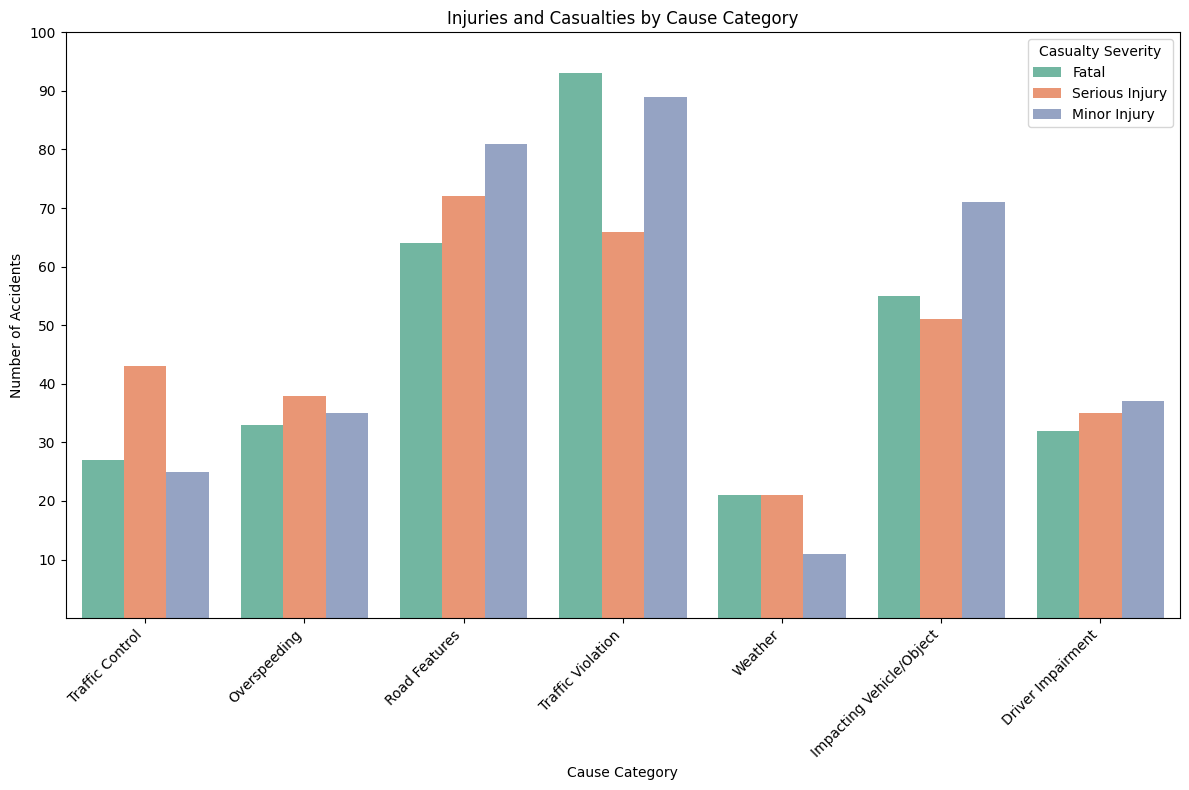

In [ ]:
#Visualization using Count Plot
plt.figure(figsize=(12, 8))
sns.countplot(x='cause', hue='casualty_severity', data=df, palette='Set2')
plt.title('Injuries and Casualties by Cause Category')
plt.xlabel('Cause Category')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(10, 101, 10))
plt.legend(title='Casualty Severity', labels=['Fatal', 'Serious Injury', 'Minor Injury'])
plt.tight_layout()
plt.show()

##FINDING THE DEATHS CAUSED BY EACH CAUSE CATEGORY

In [ ]:
# Get the number of deaths by cause category
cause_counts = df['cause'].value_counts()
print(cause_counts)

cause
Traffic Violation           248
Road Features               217
Impacting Vehicle/Object    177
Overspeeding                106
Driver Impairment           104
Traffic Control              95
Weather                      53
Name: count, dtype: int64


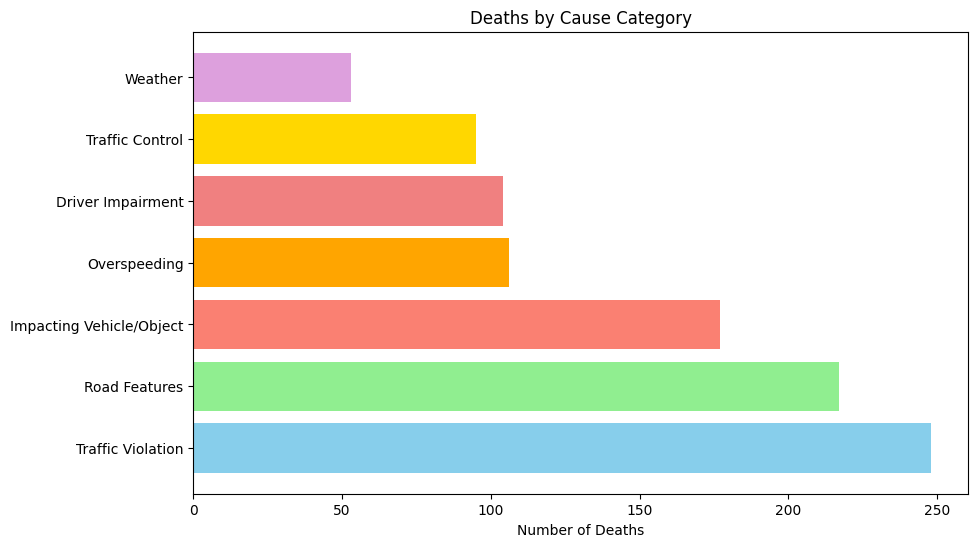

In [ ]:
# Visualization of deaths by cause category
cause_counts = df['cause'].value_counts()
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral', 'gold', 'plum']
plt.figure(figsize=(10,6))
plt.barh(cause_counts.index, cause_counts.values, color=colors)
plt.xlabel('Number of Deaths')
plt.title('Deaths by Cause Category')
plt.show()

##STATES WITH HIGHEST NUMBER OF REPORTED ACCIDENTS

In [ ]:
# Count the number of accidents for each state
state_counts_df = df['state'].value_counts().reset_index()
state_counts_df.columns = ['State', 'Number of Accidents']
print(state_counts_df)

   State  Number of Accidents
0     TR                   48
1     GJ                   44
2     UP                   44
3     DL                   44
4     HP                   43
5     AS                   40
6     ML                   39
7     AP                   38
8     CG                   38
9     WB                   37
10    MN                   36
11    OD                   35
12    SK                   34
13    RJ                   34
14    MP                   34
15    BR                   33
16    TN                   33
17    NL                   33
18    AR                   33
19    MZ                   33
20    KL                   33
21    GA                   32
22    UK                   32
23    MH                   32
24    PB                   32
25    JH                   32
26    HR                   28
27    KA                   26


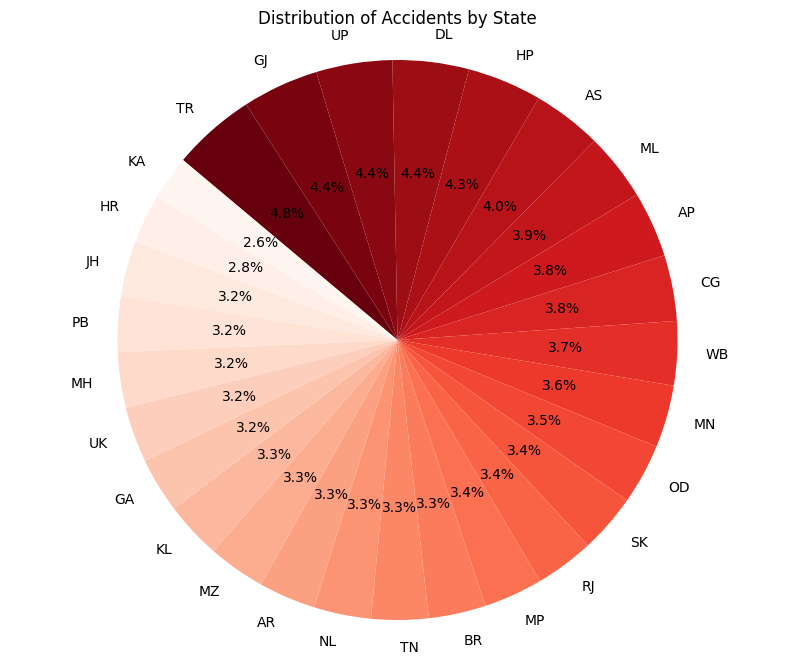

In [ ]:
# Visualization of accident distribution across states using a pie chart
state_counts = df['state'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(state_counts,
        labels=state_counts.index,
        autopct='%1.1f%%',
        colors=plt.cm.Reds(np.linspace(1, 0, len(state_counts))),
        startangle=140,
        counterclock=False)

plt.title('Distribution of Accidents by State')
plt.axis('equal')
plt.show()

##MONTHLY TREND OF ACCIDENTS ACROSS THE DATASET PERIOD

In [ ]:
# Extracting and displaying the number of accidents per month
df['date'] = pd.to_datetime(df['inverse_data'])
df['year_month'] = df['date'].dt.to_period('M')
monthly_trend = df['year_month'].value_counts().sort_index()
print("NUMBER OF ACCIDENTS PER MONTH:\n")
print(monthly_trend)

NUMBER OF ACCIDENTS PER MONTH:

year_month
2022-01    31
2022-02    33
2022-03    50
2022-04    41
2022-05    45
2022-06    42
2022-07    43
2022-08    38
2022-09    38
2022-10    49
2022-11    41
2022-12    38
2023-01    38
2023-02    38
2023-03    48
2023-04    39
2023-05    43
2023-06    28
2023-07    40
2023-08    43
2023-09    57
2023-10    44
2023-11    45
2023-12    48
Freq: M, Name: count, dtype: int64


<ipython-input-92-84f70ea5dd75>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['inverse_data'])


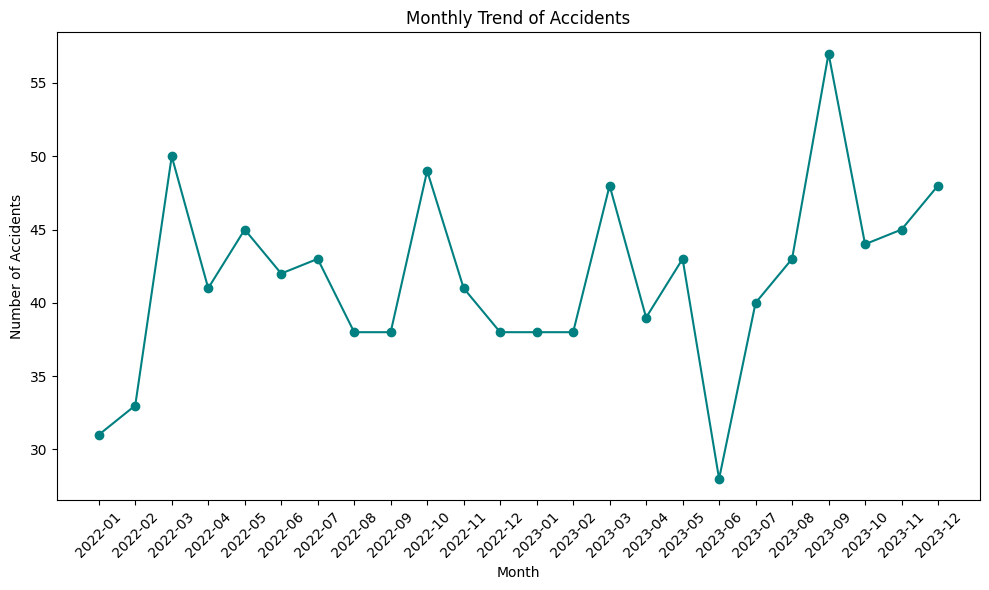

In [ ]:
# Visualizing the monthly trend of accidents using a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_trend.index.astype(str), monthly_trend.values, marker='o', color='teal')
plt.title('Monthly Trend of Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##THE TIME OF DAY DO MOST ACCIDENTS OCCUR

In [ ]:
# Categorizing accidents by time of day and displaying the count of accidents for each category
def get_time_of_day(hhmm):
    if pd.isna(hhmm):
        return 'Unknown'
    hh = hhmm // 100
    if 5 <= hh < 12:
        return 'Morning'
    elif 12 <= hh < 17:
        return 'Afternoon'
    elif 17 <= hh < 21:
        return 'Evening'
    else:
        return 'Night'
df['time_of_day'] = df['hrmn'].apply(get_time_of_day)
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
time_counts = df['time_of_day'].value_counts().reindex(time_order)
print("Number of Accidents by Time of Day:")
print(time_counts)

Number of Accidents by Time of Day:
time_of_day
Morning      307
Afternoon    203
Evening      175
Night        315
Name: count, dtype: int64


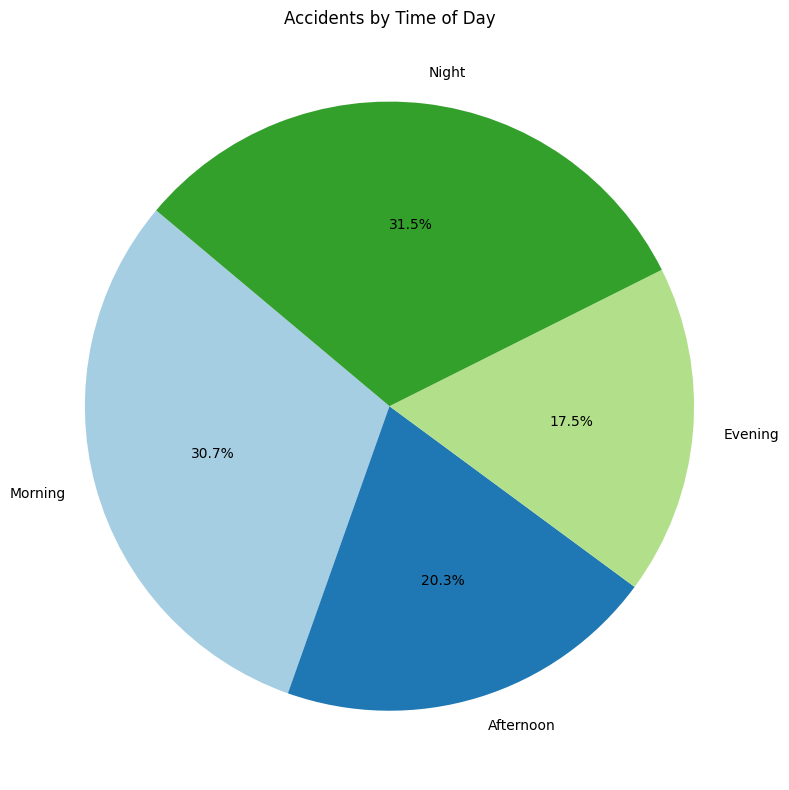

In [ ]:
# Pie chart displaying the distribution of accidents by time of day
plt.figure(figsize=(8, 8))
plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title("Accidents by Time of Day")
plt.axis('equal')
plt.tight_layout()
plt.show()

##TOP CAUSES OF ACCIDENTS IN THE DATASET

In [ ]:
# Display the number of accidents for top 10 causes
top_causes = df['cause'].value_counts().head(10)
print("Top 10 Causes of Accidents and Their Frequencies:")
print(top_causes)

Top 10 Causes of Accidents and Their Frequencies:
cause
Traffic Violation           248
Road Features               217
Impacting Vehicle/Object    177
Overspeeding                106
Driver Impairment           104
Traffic Control              95
Weather                      53
Name: count, dtype: int64


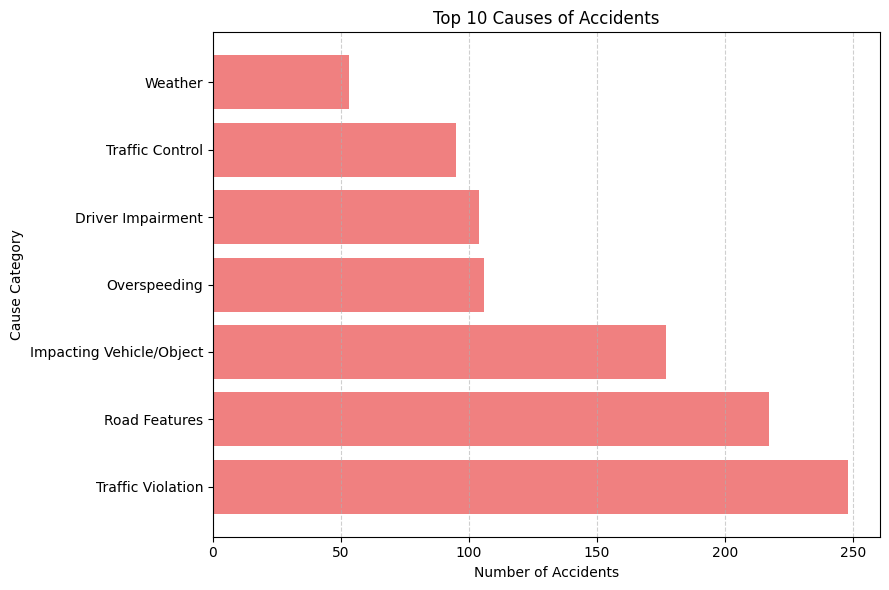

In [ ]:
# Horizontal bar chart showing the top 10 causes of accidents, highlighting the most frequent categories
plt.figure(figsize=(9, 6))
plt.barh(top_causes.index, top_causes.values, color='lightcoral')
plt.title("Top 10 Causes of Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Cause Category")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

##HEATMAP OF ACCIDENTS BY WEATHER CONDITION AND TIME OF DAY

In [ ]:
# Analyzing the distribution of accidents based on weather conditions and time of day to uncover trends.
weather_time_data = df.groupby(['weather', 'time_of_day']).size().unstack(fill_value=0)
print(weather_time_data)

time_of_day  Afternoon  Evening  Morning  Night
weather                                        
Clear               45       38       46     65
Fog                 40       42       68     73
Rain                42       41       69     66
Snow                47       22       60     54
Storm               29       32       64     57


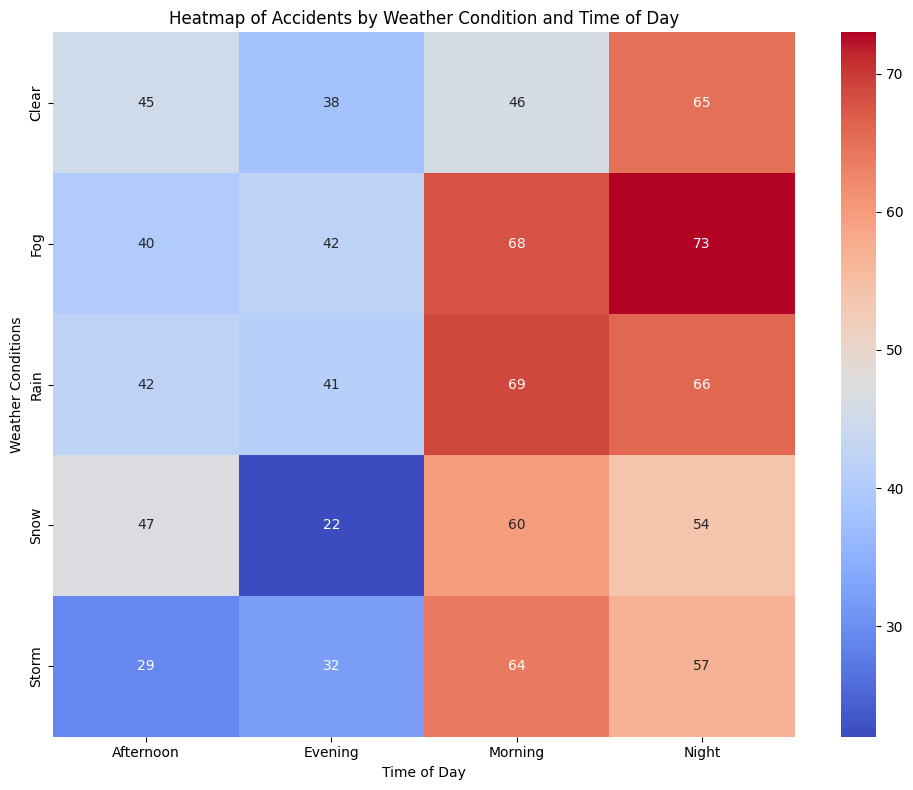

In [ ]:
# Heatmap showing accident frequency across different weather conditions and times of day.
plt.figure(figsize=(10, 8))
sns.heatmap(weather_time_data, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title("Heatmap of Accidents by Weather Condition and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Weather Conditions")
plt.tight_layout()
plt.show()

##ANALYSIS OF ACCIDENT FREQUENCY BASED ON LIGHTING CONDITIONS

In [ ]:
# Counting the number of accidents based on lighting conditions
lighting_counts = df['lum'].value_counts()
print(lighting_counts)

lum
Night       352
Daylight    331
Twilight    317
Name: count, dtype: int64


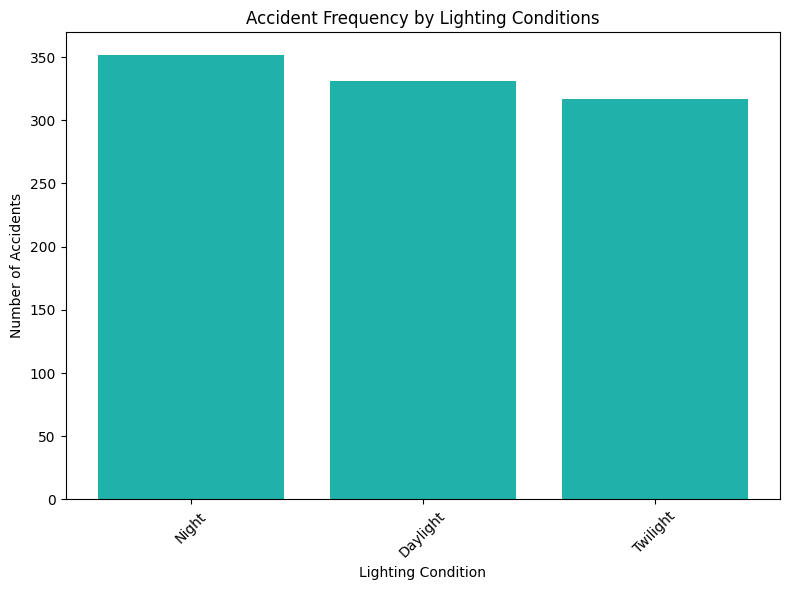

In [ ]:
# Bar plot showing accident distribution by lighting conditions, highlighting the impact of lighting on accident frequency.
plt.figure(figsize=(8, 6))
plt.bar(lighting_counts.index, lighting_counts.values, color='lightseagreen')
plt.title("Accident Frequency by Lighting Conditions")
plt.xlabel("Lighting Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##ANALYSIS OF VEHICLE TYPES MOST INVOLVED IN ACCIDENTS

In [ ]:
# Counting accidents based on vehicle type
vehicle_counts = df['vehicle_type'].value_counts()
print(vehicle_counts)

vehicle_type
Motorcycle    263
Truck         263
Car           240
Bus           234
Name: count, dtype: int64


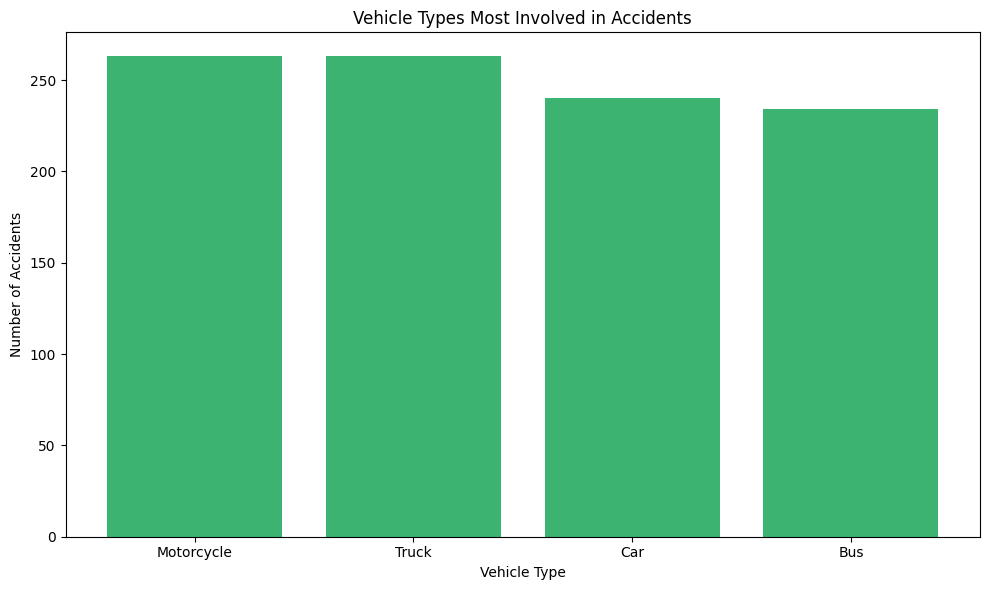

In [ ]:
# Bar plot showing vehicle types most involved in accidents.
plt.figure(figsize=(10, 6))
plt.bar(vehicle_counts.index, vehicle_counts.values, color='mediumseagreen')
plt.title("Vehicle Types Most Involved in Accidents")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

##ACCIDENT SEVERITY BY GENDER

In [ ]:
# Grouping the data by driver sex and casualty severity
severity_by_gender = df.groupby(['driver_sex', 'casualty_severity']).size().unstack(fill_value=0)
print(severity_by_gender)

casualty_severity  Fatal  Serious  Slight
driver_sex                               
F                    151      180     178
M                    174      169     148


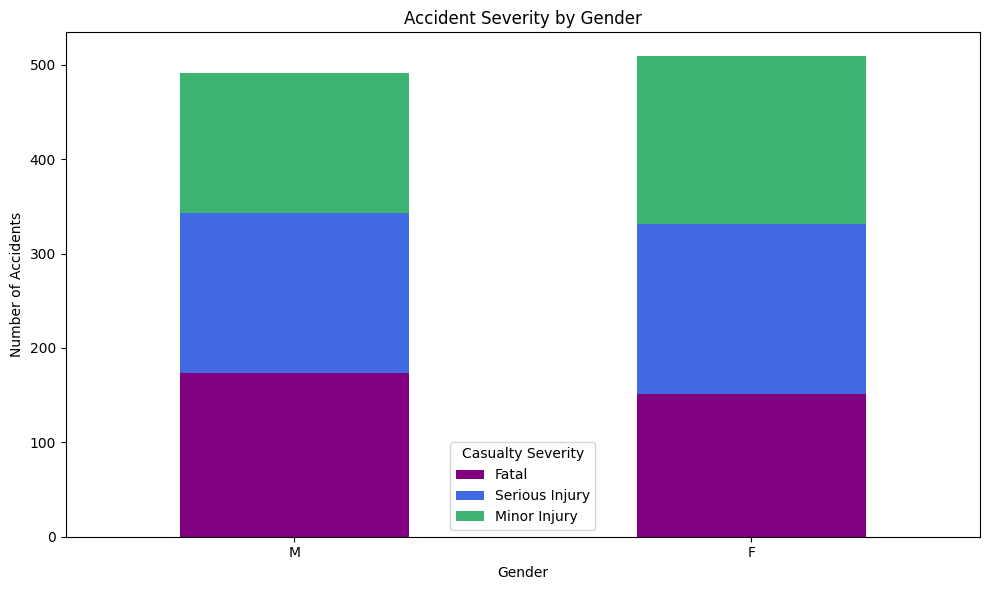

In [ ]:
# Shows accident severity by gender with a breakdown of injuries.
severity_by_gender = severity_by_gender.loc[['M', 'F']]
severity_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6), color=['Purple', 'royalblue', 'mediumseagreen'])
plt.title("Accident Severity by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Accidents")
plt.legend(title="Casualty Severity", labels=['Fatal', 'Serious Injury', 'Minor Injury'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-106-859d9fefebb8>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='age_group', columns='driver_sex', aggfunc='size', fill_value=0)


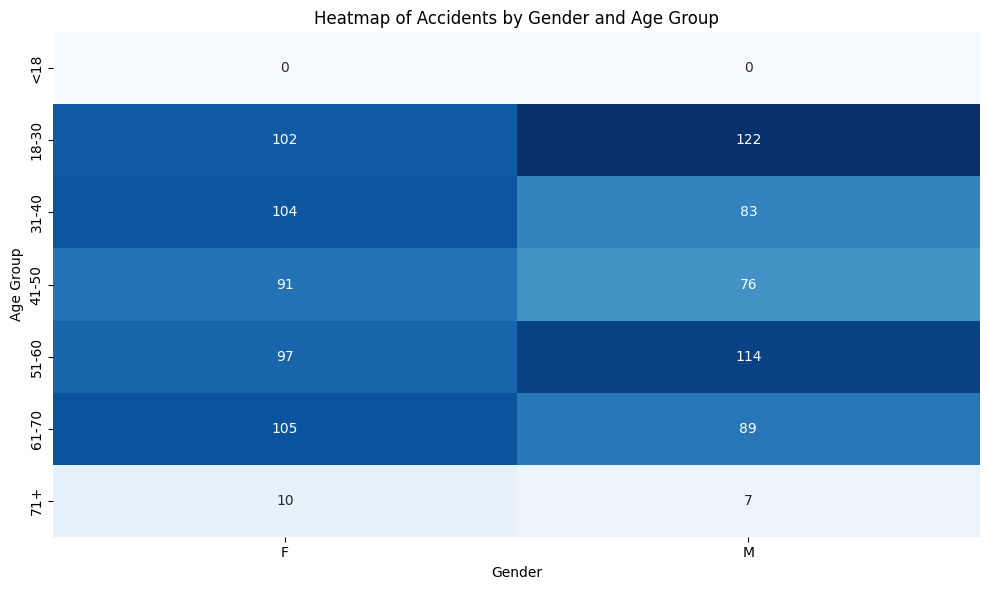

In [ ]:
# Shows accident severity by gender with a breakdown of injuries.
bins = [0, 18, 30, 40, 50, 60, 70, 100]
labels = ['<18', '18-30', '31-40', '41-50', '51-60', '61-70', '71+']
df['age_group'] = pd.cut(df['driver_age'], bins=bins, labels=labels, right=False)
pivot_table = df.pivot_table(index='age_group', columns='driver_sex', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Heatmap of Accidents by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

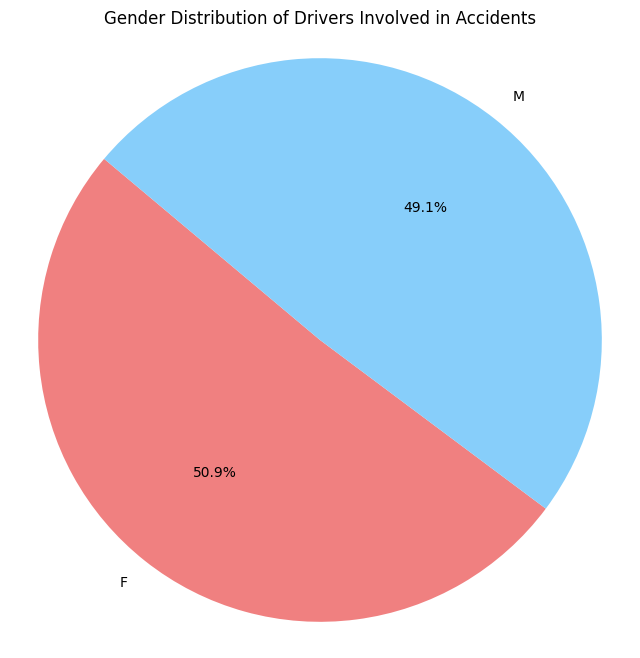

In [ ]:
# Shows gender distribution of drivers in accidents.
gender_counts = df['driver_sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution of Drivers Involved in Accidents')
plt.axis('equal')
plt.show()

##CITIES WITH THE HIGHEST ACCIDENT FATALITY RATES

In [ ]:
# Filter the dataset to only include rows where the casualty severity is 'Fatal'
fatal_accidents_by_city = df[df['casualty_severity'] == 'Fatal']['state'].value_counts()
print(fatal_accidents_by_city)

state
UP    17
OD    17
ML    16
NL    15
AS    14
DL    14
KL    14
GA    13
RJ    13
GJ    13
AP    13
PB    12
AR    12
UK    11
TR    11
KA    11
WB    11
MN    10
MH    10
CG    10
JH    10
BR     9
HR     9
HP     9
TN     9
MP     8
MZ     8
SK     6
Name: count, dtype: int64


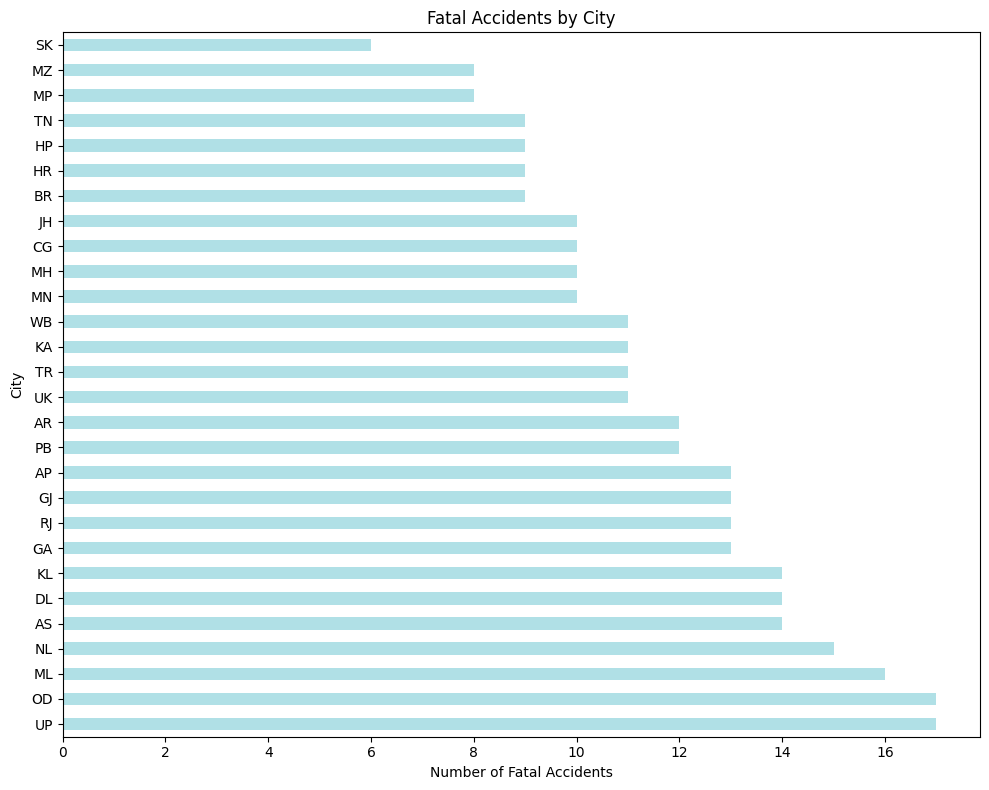

In [ ]:
# Displays the number of fatal accidents across different cities.
plt.figure(figsize=(10, 8))
fatal_accidents_by_city.plot.barh(color='powderblue')
plt.title('Fatal Accidents by City')
plt.xlabel('Number of Fatal Accidents')
plt.ylabel('City')
plt.tight_layout()
plt.show()